# DM-electron scattering rates showing the effect of changing $g(v_{\rm min},t)$

### First we look at how much the Sausage impacts the scattering rates.
Don't expect much at this point for Xenon since we are still only probing the tail whereas the Sausage modifies the shape of the whole distribution

In [3]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from DMFuncs import *
from PlotFuncs import *
from HaloFuncs import *
from Params import *
from AtomicFuncs import *

np = 20 # accuracy of p integral
nq = 20 # accuracy of q integral
ne = 200 # number of energies
nv = 1000 # number of v_mins

sigma_e = 1.0e-37 # cm^2
E_r_vals = logspace(-1.0,3.0,ne)/1000.0 # keV

# tabulate gmin
vmin = linspace(0.0,850.0,nv)
gmin_SHM = gvmin_Isotropic(vmin,v_LSR=SHM.RotationSpeed,sig=SHM.Dispersion,v_esc=SHM.EscapeSpeed)
gmin_Iso = gvmin_Isotropic(vmin)
gmin_Saus = gvmin_Triaxial(vmin)


R100_L0 = ElectronRecoilRate(Xe131,E_r_vals,100.0,sigma_e,LightMediator,vmin,gmin_Iso,np=np,nq=nq)
R100_L1 = ElectronRecoilRate(Xe131,E_r_vals,100.0,sigma_e,LightMediator,vmin,gmin_Saus,np=np,nq=nq)
R10_L0 = ElectronRecoilRate(Xe131,E_r_vals,10.0,sigma_e,LightMediator,vmin,gmin_Iso,np=np,nq=nq)
R10_L1 = ElectronRecoilRate(Xe131,E_r_vals,10.0,sigma_e,LightMediator,vmin,gmin_Saus,np=np,nq=nq)

R100_H0 = ElectronRecoilRate(Xe131,E_r_vals,100.0,sigma_e,HeavyMediator,vmin,gmin_Iso,np=np,nq=nq)
R100_H1 = ElectronRecoilRate(Xe131,E_r_vals,100.0,sigma_e,HeavyMediator,vmin,gmin_Saus,np=np,nq=nq)
R10_H0 = ElectronRecoilRate(Xe131,E_r_vals,10.0,sigma_e,HeavyMediator,vmin,gmin_Iso,np=np,nq=nq)
R10_H1 = ElectronRecoilRate(Xe131,E_r_vals,10.0,sigma_e,HeavyMediator,vmin,gmin_Saus,np=np,nq=nq)


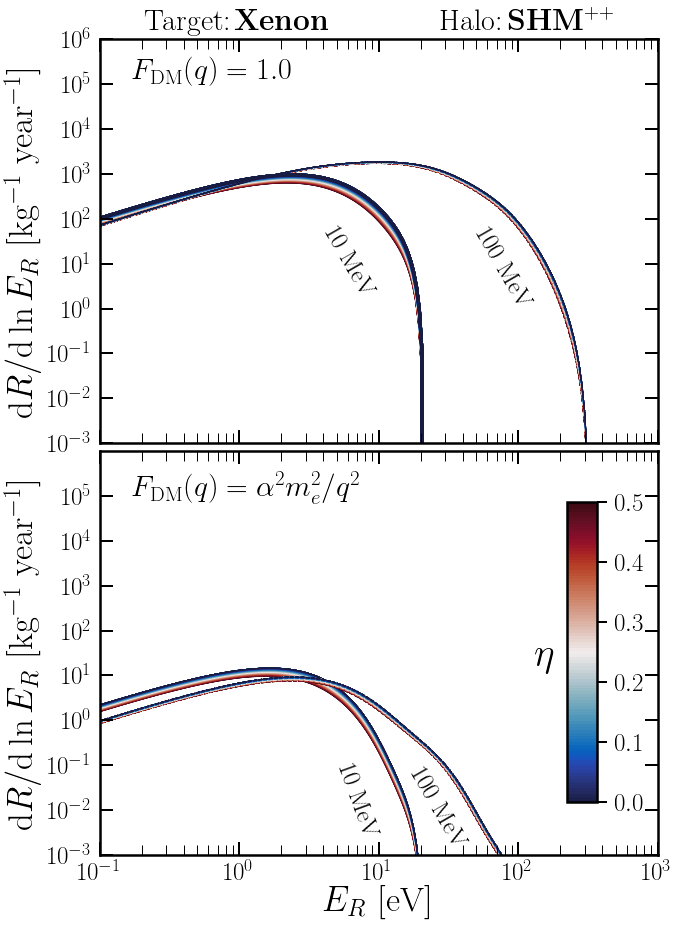

In [4]:
#####
# set up plot
hspace=0.02
lw=2.5
lfs=35
tfs=25
size_x=10
size_y=15

xlab2 = r'$E_R$ [eV]'
ylab2 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
ylab1 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
fig, axarr = plt.subplots(2, 1,figsize=(size_x,size_y))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=hspace)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_ylabel(ylab1,fontsize=lfs)
ax2.set_ylabel(ylab2,fontsize=lfs)
ax2.set_xlabel(xlab2,fontsize=lfs)
#####



# PLOT:
x = E_r_vals*1000.0 
neta = 100
eta_vals = linspace(0.0,0.5,neta)
dRdlnE_100_Light = zeros(shape=(neta,ne))
dRdlnE_10_Light = zeros(shape=(neta,ne))
dRdlnE_100_Heavy = zeros(shape=(neta,ne))
dRdlnE_10_Heavy = zeros(shape=(neta,ne))
col = cmocean.cm.balance(linspace(0,1,neta))

for i in range(0,neta):
    dRdlnE_100_Light[i,:] = (1-eta_vals[i])*R100_L0 + eta_vals[i]*R100_L1
    dRdlnE_10_Light[i,:] = (1-eta_vals[i])*R10_L0 + eta_vals[i]*R10_L1
    dRdlnE_100_Heavy[i,:] = (1-eta_vals[i])*R100_H0 + eta_vals[i]*R100_H1
    dRdlnE_10_Heavy[i,:] = (1-eta_vals[i])*R10_H0 + eta_vals[i]*R10_H1
    
for i in flipud(range(0,neta)):
    ax1.fill_between(x,dRdlnE_100_Heavy[i,:],y2=dRdlnE_100_Heavy[0,:],linestyle='--',color=col[i,:],lw=1)
    ax1.fill_between(x,dRdlnE_10_Heavy[i,:],y2=dRdlnE_10_Heavy[0,:],color=col[i,:],lw=3)
    ax2.fill_between(x,dRdlnE_100_Light[i,:],y2=dRdlnE_100_Light[0,:],linestyle='--',color=col[i,:],lw=1,zorder=-1)
    ax2.fill_between(x,dRdlnE_10_Light[i,:],y2=dRdlnE_10_Light[0,:],color=col[i,:],lw=1,zorder=-2)

# Tweak ranges on show
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([0.1,1.0e3])
ax1.set_ylim([1.0e-3,1.0e6])
ax1.set_xticklabels([])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([0.1,1.0e3])
ax2.set_ylim([1.0e-3,1.0e6])
ax1.set_yticks(10.0**arange(-3,7))
ax2.set_yticks(10.0**arange(-3,6))

# Labels
plt.gcf().text(0.43,0.64,r'10 MeV',fontsize=25,rotation=-60)
plt.gcf().text(0.64,0.63,r'100 MeV',fontsize=25,rotation=-60)
plt.gcf().text(0.45,0.14,r'10 MeV',fontsize=25,rotation=-70)
plt.gcf().text(0.55,0.13,r'100 MeV',fontsize=25,rotation=-60)
plt.gcf().text(0.17,0.84,r'$F_{\rm DM}(q) = 1.0$',fontsize=30)
plt.gcf().text(0.17,0.45,r'$F_{\rm DM}(q) = \alpha^2 m^2_e/q^2$',fontsize=30)
ax1.set_title(r'Target:\,{\bf Xenon}\quad\quad\quad\quad Halo:\,{\bf SHM}$^{++}$',fontsize=30,pad=10)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="15%", height="30%", bbox_to_anchor=[400, -500, 200, 1000]) 
norm = mpl.colors.Normalize(vmin=0,vmax=eta_vals[-1])
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.balance, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=arange(0.0,eta_vals[-1]+0.1,0.1),boundaries=linspace(0.0,eta_vals[-1],100),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.73,0.3,r'$\eta$',fontsize=40,color='k')


plt.show()
fig.savefig('../plots/DMRates_Xe_SHMpp.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/DMRates_Xe_SHMpp.png',bbox_inches='tight')


### Not a big effect, lets try some streams

# S1 and S2 streams

In [ ]:
# tabulate gmin
vmin = linspace(0.0,850.0,nv)
gmin = (1-0.2)*gvmin_Isotropic(vmin) + 0.2*gvmin_Triaxial(vmin)
gmin_S1 = gvmin_Triaxial(vmin,v_shift=S1.Velocity,sig=S1.Dispersion)
